In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.drop(['Id'], axis=1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
features = data.drop('SalePrice',axis=1)
features.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
labels = data['SalePrice']
labels.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [6]:
#SaleCondition  = data['SaleCondition']
#SaleCondition.head()
#print(pd.get_dummies(SaleCondition))
#SaleCondition = pd.get_dummies(SaleCondition)

string_col = features.select_dtypes(include = 'object')
col_categorical = pd.get_dummies(string_col)
col_categorical.head()

col_string_name=string_col.columns.values.tolist()

for name in col_string_name:
    features = features.drop(name,axis=1)

In [7]:
features = pd.concat([features,col_categorical], axis=1)


In [8]:
features.fillna(features.mean(),inplace=True)
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [60]:
regr = RandomForestRegressor(max_depth=30, random_state=0,
...                              n_estimators=100)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
r2_score(y_test, y_pred)

0.8700494540906343

In [61]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [62]:
base_accuracy = evaluate(regr, X_test,y_test)

Model Performance
Average Error: 17353.8596 degrees.
Accuracy = 89.92%.


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 17353.85958506224)
('Mean Squared Error:', 954017815.0433282)
('Root Mean Squared Error:', 30887.178813276685)


In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head()

,Actual,Predicted
892,154500,141887.25
1105,325000,320087.04
413,115000,116218.50
522,159000,151869.50
1036,315500,318713.59
614,75500,83221.00
218,311500,208143.23
1160,146000,151862.00
649,84500,82695.00
887,135500,129245.34


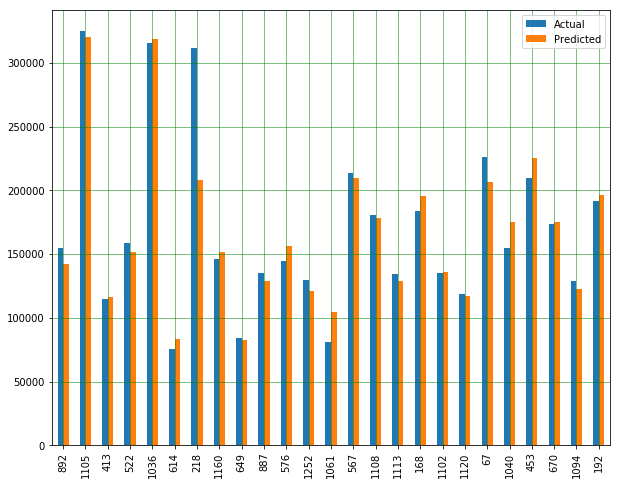

In [17]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 25)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 190, num = 20)]
max_depth.append(None)
min_samples_split = [2, 3,4,5, 10]
min_samples_leaf = [1, 2,3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 3, 4], 'n_estimators': [100, 179, 258, 337, 416, 495, 575, 654, 733, 812, 891, 970, 1050, 1129, 1208, 1287, 1366, 1445, 1525, 1604, 1683, 1762, 1841, 1920, 2000], 'min_samples_split': [2, 3, 4, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 38, 47, 57, 66, 76, 85, 95, 104, 114, 123, 133, 142, 152, 161, 171, 180, 190, None]}


In [34]:
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30, total=   2.6s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=30, total=   2.6s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=10 


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=90, total=   7.9s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=90, total=   6.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10, total=  13.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=10, max_features=sqrt, max_depth=10, total=  13.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=5, max_features=auto, max_depth=10, total=  52.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=F

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=70, total=  11.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=80, total=   8.0s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=80, total=  10.3s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=80, total=  10.8s
[CV] bootstrap=Fals

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=100, total= 1.1min
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=sqrt, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=100, total= 1.1min
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=sqrt, max_depth=90, total=   8.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=sqrt, max_depth=90, total=  10.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=Fal

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90, total=   7.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=110, total=   7.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=110, total=   6.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=110, total=   6.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=80 
[CV]  bootstrap=False, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.9min


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50, total=  28.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50, total=  27.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=50, total=  59.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=50, total=  29.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  bootstrap

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=80, total=  31.4s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=20, total=  11.5s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=20, total=   9.7s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=20, total=  11.2s
[CV] bootstrap=T

[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=auto, max_depth=90, total=  16.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=90, total=   2.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=90, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=90, total=   2.7s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=None 
[CV]  bootstrap=Tru

[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=100, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=10, max_features=sqrt, max_depth=40, total=   3.4s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=10, max_features=sqrt, max_depth=40, total=   3.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, min_samples_split=2, max_features=sqrt, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=100, total=   2.2s
[CV] bootstrap=True, min_s

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=100, total=   5.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=100, total=   5.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=auto, max_depth=10, total=  37.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=20, total=  14.4s
[CV] bootstrap=True, mi

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=107, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [35]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [65]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

y_pred = best_random.predict(X_test)
print(r2_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model Performance
Average Error: 17375.5489 degrees.
Accuracy = 89.76%.
0.8527658115991074
('Mean Absolute Error:', 17375.548890041493)
('Mean Squared Error:', 1080903798.710197)
('Root Mean Squared Error:', 32877.10143413189)


In [7]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df.head(25)
df2.head()

,Actual,Predicted
892,11.947956,11.886045
1105,12.691584,12.590056
413,11.652696,11.604991
522,11.976666,11.921915
1036,12.661917,12.706744


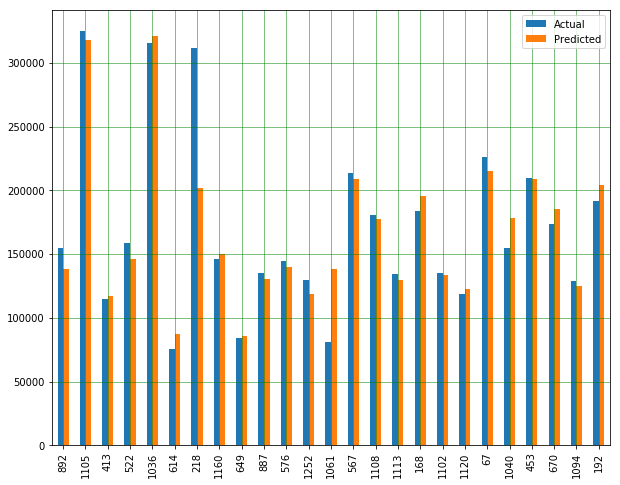

In [58]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [1]:
%run Data_exploration.ipynb

/home/juhi/.local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/juhi/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/juhi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/juhi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



('Skewness is: ', 1.8828757597682129)
('kurtosis is: ', 6.536281860064529)
('Skewness is: ', 0.12134661989685333)
('kurtosis is: ', 0.809519155707878)


<Figure size 640x480 with 1 Axes>

<Figure size 2500x700 with 1 Axes>

(1460, 79)
(1460, 74)


<Figure size 1900x700 with 1 Axes>

(1460, 75)
(1460, 67)


In [2]:
features,labels = data_preprocessed()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)

In [6]:
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print("r2 score is: ",r2_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('r2 score is: ', 0.8879230006662595)
('Mean Absolute Error:', 0.09150447282058208)
('Mean Squared Error:', 0.019013183944257803)
('Root Mean Squared Error:', 0.13788830241995803)
